# Data collection and processing

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


601

In [4]:
# Empty lists to store data
temp = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
c_coord = []
c_lat=[]
c_lon=[]
country=[]
dt=[]

# Call weather API

# Set basics of API call
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key + "&q="

city_count = 1
success = 0
fail = 0

for city in cities:
    
    # Define query
    query_url = url + city
    
    # Print to terminal
    print(f"Getting city {city_count}: {city}")
    city_count = city_count+1
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    try:
        temp.append(weather_json['main']['temp'])
        maxtemp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        c_coord.append(weather_json['coord'])
        c_lat.append(weather_json['coord']['lat'])
        c_lon.append(weather_json['coord']['lon'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])
        success = success+1
    except KeyError: 
        print("City not found")
        # Still need to add empty data to lists to keep in sync
        temp.append(None)
        maxtemp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        windspeed.append(None)
        c_coord.append(None)
        c_lat.append(None)
        c_lon.append(None)
        country.append(None)
        dt.append(None)
        fail = fail+1
        
    # Rate limit is 60 per minute, so add a sleep() call of 1 second after each request
    time.sleep(1)

print(f"{success} cities added, {fail} not added")

Getting city 1: san patricio
Getting city 2: port alfred
Getting city 3: isangel
Getting city 4: taoudenni
Getting city 5: rikitea
Getting city 6: te anau
Getting city 7: mataura
Getting city 8: ponta do sol
Getting city 9: stepnyak
Getting city 10: ostrovnoy
Getting city 11: kodiak
Getting city 12: tuktoyaktuk
Getting city 13: busselton
Getting city 14: hasaki
Getting city 15: bembereke
Getting city 16: berlevag
Getting city 17: kapaa
Getting city 18: najran
Getting city 19: itoigawa
Getting city 20: okha
Getting city 21: stykkisholmur
Getting city 22: barentsburg
City not found
Getting city 23: stawell
Getting city 24: port elizabeth
Getting city 25: marsh harbour
Getting city 26: butaritari
Getting city 27: umzimvubu
City not found
Getting city 28: hobart
Getting city 29: lata
Getting city 30: porto murtinho
Getting city 31: carnarvon
Getting city 32: sao joao da barra
Getting city 33: punta arenas
Getting city 34: mabai
Getting city 35: ankara
Getting city 36: khatanga
Getting city

Getting city 288: salalah
Getting city 289: big spring
Getting city 290: gat
Getting city 291: walvis bay
Getting city 292: port blair
Getting city 293: clyde river
Getting city 294: paamiut
Getting city 295: margate
Getting city 296: mount isa
Getting city 297: saratoga springs
Getting city 298: zheleznodorozhnyy
Getting city 299: tias
Getting city 300: inirida
Getting city 301: kollam
Getting city 302: la ronge
Getting city 303: freeport
Getting city 304: aguimes
Getting city 305: constitucion
Getting city 306: severo-yeniseyskiy
Getting city 307: husavik
Getting city 308: pinheiro machado
Getting city 309: tessalit
Getting city 310: san lorenzo
Getting city 311: shizunai
Getting city 312: mazagao
Getting city 313: tevriz
Getting city 314: isilkul
Getting city 315: katsuura
Getting city 316: kidal
Getting city 317: cherskiy
Getting city 318: kadaya
Getting city 319: saint-joseph
Getting city 320: upington
Getting city 321: yialos
City not found
Getting city 322: vyazemskiy
Getting ci

Getting city 575: imphal
Getting city 576: sechura
Getting city 577: vredendal
Getting city 578: aksay
Getting city 579: kirovskiy
Getting city 580: glodeni
Getting city 581: tukrah
Getting city 582: port augusta
Getting city 583: boa vista
Getting city 584: nha trang
Getting city 585: muroto
Getting city 586: ushtobe
Getting city 587: isla mujeres
Getting city 588: chilca
Getting city 589: coquimbo
Getting city 590: bubaque
Getting city 591: vilyuysk
Getting city 592: the pas
Getting city 593: ayan
Getting city 594: saquarema
Getting city 595: lakes entrance
Getting city 596: cangzhou
Getting city 597: ouro preto do oeste
Getting city 598: ankazobe
Getting city 599: deltona
Getting city 600: bismarck
Getting city 601: vernon
554 cities added, 47 not added


In [5]:
# Create dataframe
city_wthr = pd.DataFrame( {
            'City' : cities,
            'Lat' : c_lat,
            'Lon' : c_lon,
            'Max Temp' : maxtemp,
            'Humidity' : humidity,
            'Cloudiness' : cloudiness,
            'Wind Speed' : windspeed,
            'Country' : country,
            'Date' : dt
}, dtype='float')
print(city_wthr.dtypes)
city_wthr.head(10)

City           object
Lat           float64
Lon           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,84.04,85.0,2.0,3.56,US,1.627466e+09
1,port alfred,-33.5906,26.8910,64.56,65.0,85.0,6.22,ZA,1.627466e+09
2,isangel,-19.5500,169.2667,69.82,66.0,3.0,11.21,VU,1.627466e+09
3,taoudenni,22.6783,-3.9836,105.40,14.0,100.0,11.63,ML,1.627466e+09
4,rikitea,-23.1203,-134.9692,74.16,82.0,100.0,14.83,PF,1.627466e+09
5,te anau,-45.4167,167.7167,42.62,93.0,56.0,1.66,NZ,1.627466e+09
6,mataura,-46.1927,168.8643,47.48,96.0,94.0,3.04,NZ,1.627466e+09
7,ponta do sol,32.6667,-17.1000,77.72,71.0,22.0,2.39,PT,1.627466e+09
8,stepnyak,52.8339,70.7803,73.87,32.0,71.0,10.42,KZ,1.627466e+09
9,ostrovnoy,68.0531,39.5131,47.34,85.0,99.0,9.78,RU,1.627466e+09


In [6]:
print(city_wthr.shape)
# Drop rows with unfound cities
city_wther = city_wthr.dropna()
print(city_wther.shape)

(601, 9)
(554, 9)


In [7]:
city_wther.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.896151,21.466082,70.017653,69.303249,54.185921,8.312978,1.627466e+09
std,34.223295,92.400650,15.841551,23.296464,38.685262,5.713753,2.090407e+02
min,-54.800000,-179.166700,27.000000,7.000000,0.000000,0.000000,1.627465e+09
25%,-10.382475,-59.336825,57.907500,58.000000,13.250000,3.970000,1.627466e+09
50%,23.025650,26.903850,71.510000,76.000000,61.000000,6.970000,1.627466e+09
75%,48.418950,104.203325,81.277500,87.000000,94.000000,11.672500,1.627466e+09
max,78.218600,179.316700,118.360000,100.000000,100.000000,30.470000,1.627466e+09


In [8]:
# Save CSVs
city_wthr.to_csv("output/all_cities.csv")
city_wther.to_csv("output/city_weather.csv")

# Scatter plots

<function matplotlib.pyplot.show(close=None, block=None)>

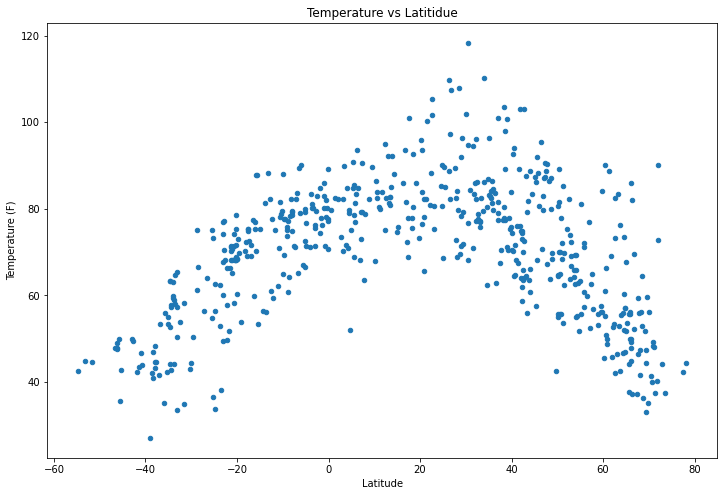

In [10]:
## Scatter plots

# Temperature vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Max Temp', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitidue")
plt.savefig("output/temp_lat.png", format='png')
plt.show

The plot shows temperature (F) vs Latitude, with the temperature being the current temperatures of cities obtained at the time of running the data. This shows that cities at extremes of latitude are generally cooler than those closer to the equator

<function matplotlib.pyplot.show(close=None, block=None)>

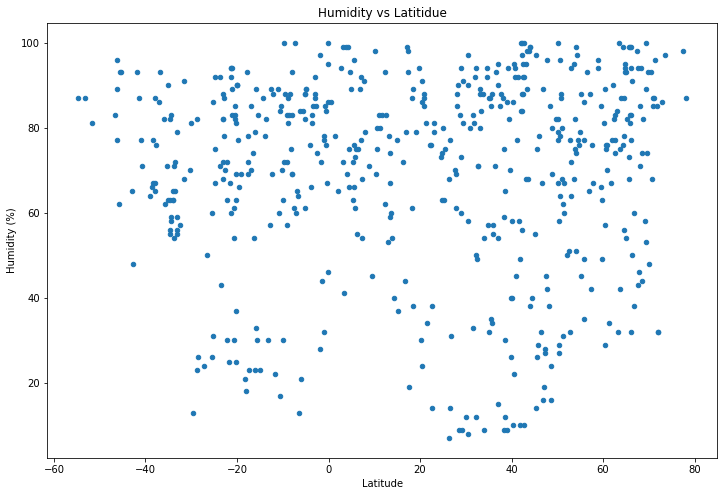

In [11]:
# Humidity vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Humidity', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitidue")
plt.savefig("output/humidity_lat.png", format='png')
plt.show

This plot shows humidity vs latitude, again for the current humidity readings at the time of extracting the data. There are no obvious trends to be drawn from this data.

<function matplotlib.pyplot.show(close=None, block=None)>

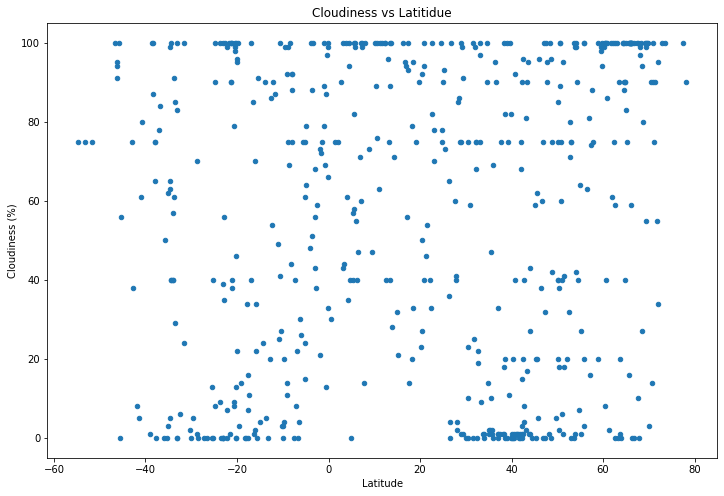

In [12]:
# Cloudiness vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Cloudiness', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitidue")
plt.savefig("output/cloud_lat.png", format='png')
plt.show

This shows cloudiness vs latitude, again using current data. There are no obvious trends, but the number of cities with either 0 or 100% cloud cover is noted, and would be worth further investigation to rule out data errors.

<function matplotlib.pyplot.show(close=None, block=None)>

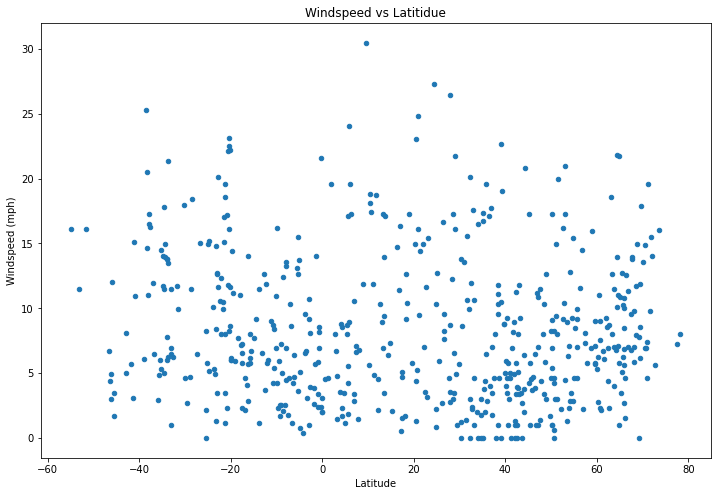

In [13]:
# Windspeed vs latitude

city_wther.plot(kind="scatter", x='Lat', y='Wind Speed', figsize=(12,8))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title("Windspeed vs Latitidue")
plt.savefig("output/wind_lat.png", format='png')
plt.show

This plot shows (current) windspeed against latitutde. There are no obvious trends to be drawn from this data.

In [14]:
## Linear regression

northern = city_wther[city_wther['Lat'] >= 0]
southern = city_wther[city_wther['Lat'] < 0]
print(northern.shape)
print(southern.shape)

(357, 9)
(197, 9)


In [15]:
# Calculate linear regressions
nt_temp_rg = linregress(northern['Lat'], northern['Max Temp'])
nt_humd_rg = linregress(northern['Lat'], northern['Humidity'])
nt_clod_rg = linregress(northern['Lat'], northern['Cloudiness'])
nt_wind_rg = linregress(northern['Lat'], northern['Wind Speed'])
st_temp_rg = linregress(southern['Lat'], southern['Max Temp'])
st_humd_rg = linregress(southern['Lat'], southern['Humidity'])
st_clod_rg = linregress(southern['Lat'], southern['Cloudiness'])
st_wind_rg = linregress(southern['Lat'], southern['Wind Speed'])

regressions = pd.DataFrame([nt_temp_rg, nt_humd_rg, nt_clod_rg, nt_wind_rg, st_temp_rg, st_humd_rg, st_clod_rg, st_wind_rg],
                          index=['Northern Temp', 'Northern Humidity', 'Northern Cloudiness', 'Northern Wind Speed',
                                'Southern Temp', 'Southern Humidity', 'Southern Cloudiness', 'Southern Wind Speed'])
regressions

,slope,intercept,rvalue,pvalue,stderr
Northern Temp,-0.500778,93.050528,-0.617254,7.225786e-39,0.033878
Northern Humidity,0.046688,67.323125,0.037929,4.749887e-01,0.065285
Northern Cloudiness,0.066897,53.939727,0.034149,5.201292e-01,0.103911
Northern Wind Speed,-0.010826,8.523628,-0.036836,4.878179e-01,0.015588
Southern Temp,0.843996,82.360006,0.795020,3.298753e-44,0.046114
Southern Humidity,-0.004274,69.369539,-0.002691,9.700662e-01,0.113757
Southern Cloudiness,0.025979,50.241361,0.009096,8.990505e-01,0.204517
Southern Wind Speed,-0.105433,6.573873,-0.256048,2.816029e-04,0.028505


Correlations (with rvalue being closer to 1 and pvalue being less than 0.05) are noted as follows:
- Temperature : strong correlation
- Humidity : no correlation
- Cloudiness : no correlation
- Wind speed : weak correlation in the southern hemisphere

<function matplotlib.pyplot.show(close=None, block=None)>

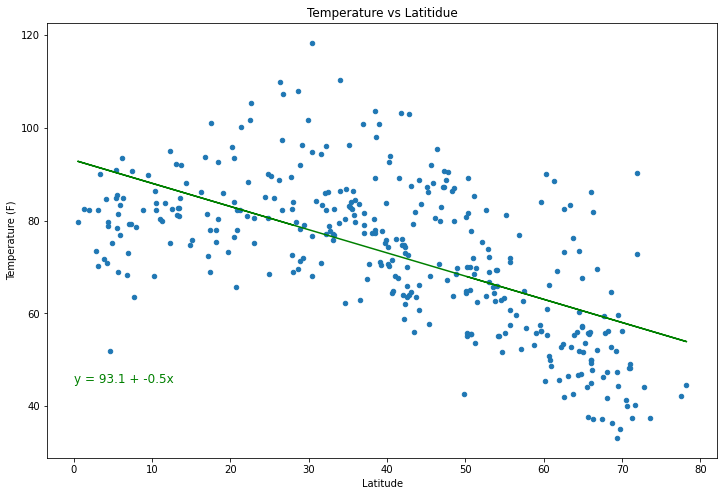

In [16]:
# New plots

# Northern temperature
regress_slope = nt_temp_rg[0]
regress_icept = nt_temp_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Max Temp', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(0,45),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitidue")
plt.savefig("output/temp_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

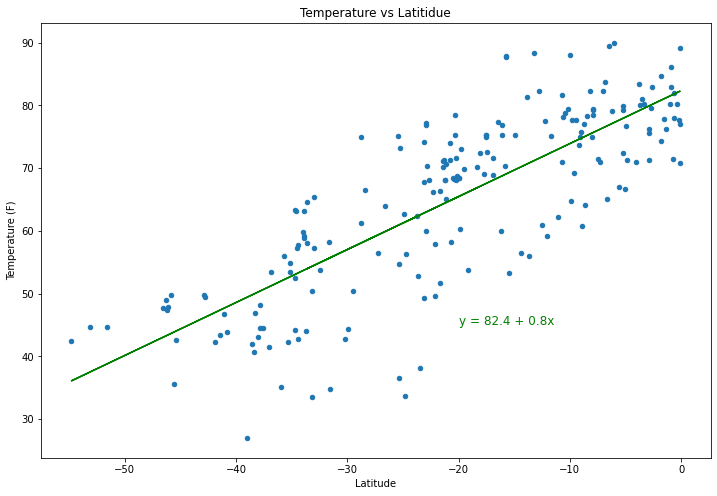

In [17]:
# Southern temperature
regress_slope = st_temp_rg[0]
regress_icept = st_temp_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Max Temp', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-20,45),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitidue")
plt.savefig("output/temp_southern.png", format='png')
plt.show

These plots show the very strong and clear correlation between latitude and temperature, although there is a significant amount of variation in the data, implying that latitude is only one of several factors contributing to temperature.

<function matplotlib.pyplot.show(close=None, block=None)>

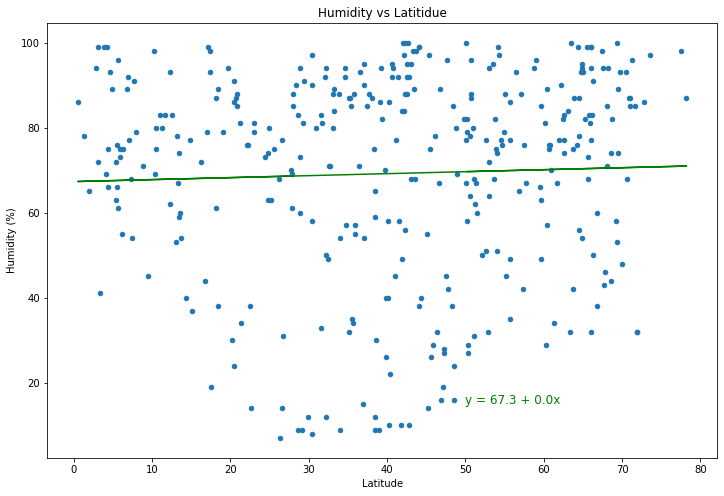

In [18]:
# Northern humidity
regress_slope = nt_humd_rg[0]
regress_icept = nt_humd_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Humidity', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(50,15),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitidue")
plt.savefig("output/humidity_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

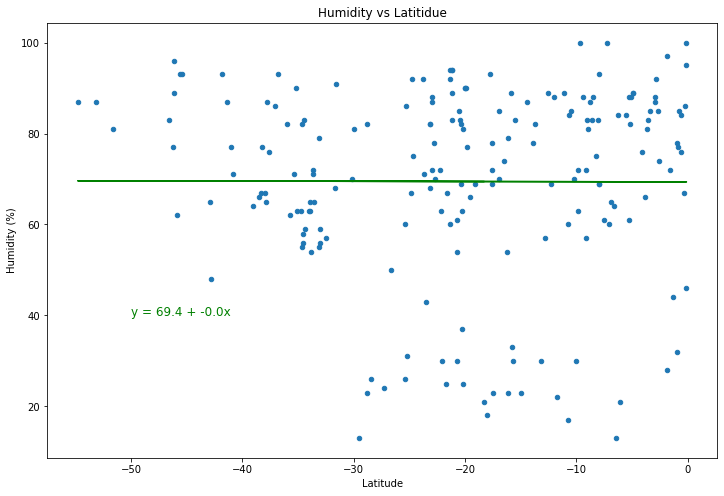

In [19]:
# Southern humidity
regress_slope = st_humd_rg[0]
regress_icept = st_humd_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Humidity', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-50,40),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitidue")
plt.savefig("output/humidity_southern.png", format='png')
plt.show

These plots show no correlation between latitude and humidity

<function matplotlib.pyplot.show(close=None, block=None)>

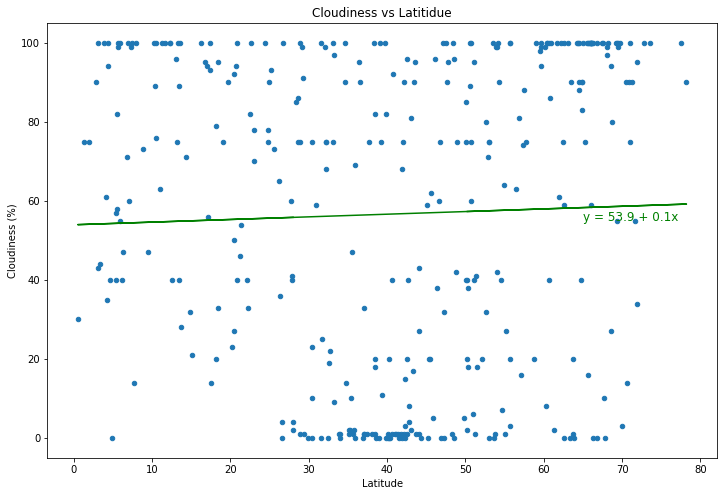

In [20]:
# Northern cloudiness
regress_slope = nt_clod_rg[0]
regress_icept = nt_clod_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Cloudiness', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(65,55),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitidue")
plt.savefig("output/cloud_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

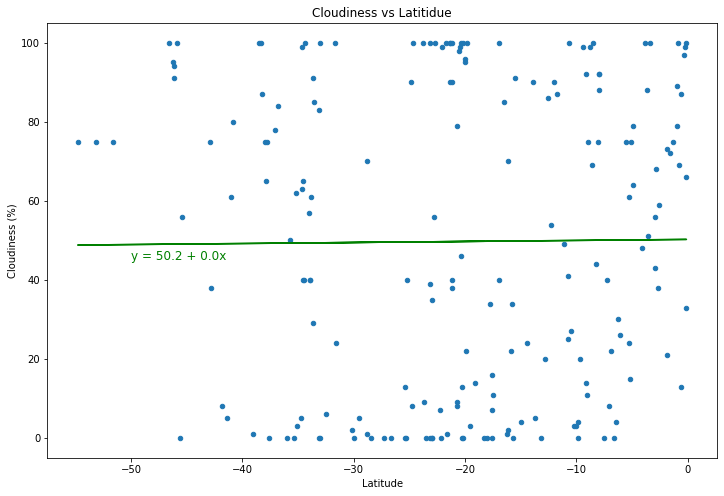

In [21]:
# Southern cloudiness
regress_slope = st_clod_rg[0]
regress_icept = st_clod_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Cloudiness', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-50,45),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitidue")
plt.savefig("output/cloud_southern.png", format='png')
plt.show

These plots show no correlation between cloudiness and latitude

<function matplotlib.pyplot.show(close=None, block=None)>

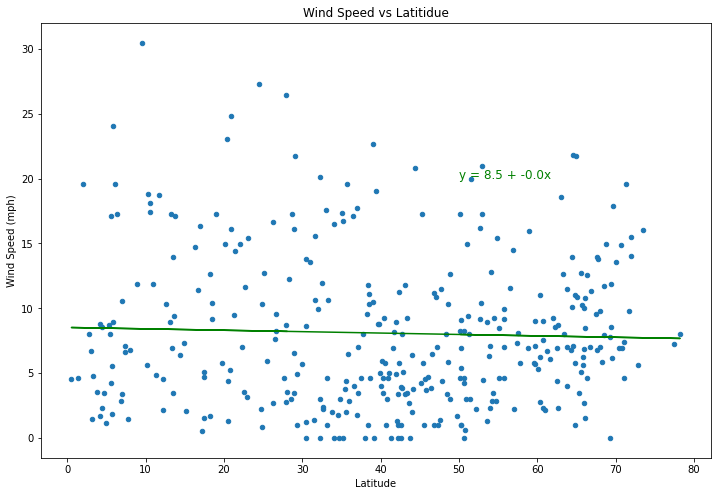

In [22]:
# Northern wind speed
regress_slope = nt_wind_rg[0]
regress_icept = nt_wind_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in northern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

northern.plot(kind="scatter", x='Lat', y='Wind Speed', figsize=(12,8))
plt.plot(northern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(50,20),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Latitidue")
plt.savefig("output/wind_northern.png", format='png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

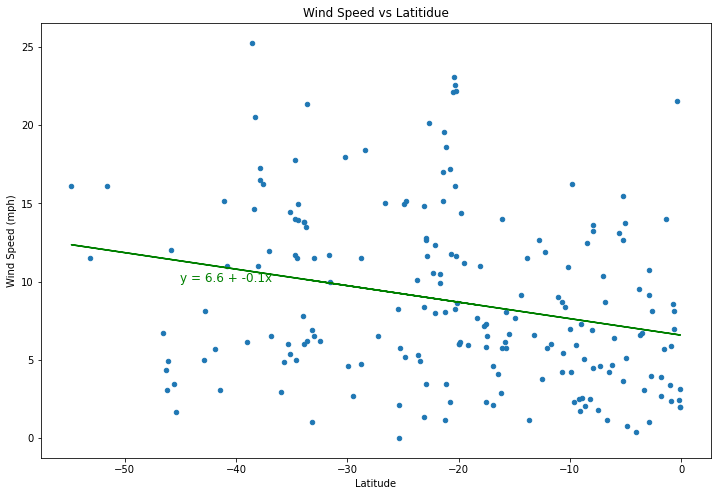

In [23]:
# Southern cloudiness
regress_slope = st_wind_rg[0]
regress_icept = st_wind_rg[1]
regress_values = [(x * regress_slope) + regress_icept for x in southern['Lat']]
regress_text = f"y = {round(regress_icept,1)} + {round(regress_slope,1)}x"

southern.plot(kind="scatter", x='Lat', y='Wind Speed', figsize=(12,8))
plt.plot(southern['Lat'], regress_values, color="g")
plt.annotate(regress_text,(-45,10),fontsize=12,color="g")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Latitidue")
plt.savefig("output/wind_southern.png", format='png')
plt.show

These plots show a weak correlation between wind speed and latitude in the southern hemisphere, with no correlation in the northern hemisphere.

# Analysis

The trends noted above are:

Correlations with latitude (with rvalue being closer to 1 and pvalue being less than 0.05) are noted as follows:

- Temperature : strong correlation
    Northern hemisphere: r=-0.62; p=7.22e-39
    Southern hemisphere: r=0.79; p=3.30e-44
- Humidity : no correlation (p=0.474, 0.970)
- Cloudiness : no correlation (p=0.520, 0.899)
- Wind speed : weak correlation in the southern hemisphere
    Southern hemisphere: r=-0.25; p=2.81-04

These trends imply that latitude is a significant contributor to temperature, although the variance from the trend (as shown in the plots) suggests that there are other contributory factors.

For humidity and cloudiness, latitude does not appear to be a significant factor; local weather conditions are more likely to be significant here.

Wind speed is not correlated with latitude in the northern hemisphere, but there is a weak correlation in the southern hemisphere. However, there is significant variation, and the correlation may just be a coincidence without implying causation.